#EDA Mini Project: Superstore Sales Analysis

##🎯 Objective

Use Exploratory Data Analysis (EDA) to identify key sales drivers, high-performing categories, regional trends, and valuable customer segments to support data-driven business decisions

##Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
df=df = pd.read_csv('/content/train.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


##Basic Data Understanding

In [3]:
df.shape


(9800, 18)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df.duplicated().sum()

np.int64(0)

##Cleaning Data

In [10]:
df.drop(columns=['Postal Code'], inplace=True)

In [14]:
df['Order Date']=pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Date'], dayfirst=True)

## KPI Overview

In [12]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
total_orders = df['Order ID'].nunique()

print(f"Total Sales: ${total_sales:.2f}")
print("Average Sales: ${:.2f}".format(avg_sales))
print(f"Total Orders: {total_orders}")

Total Sales: $2261536.78
Average Sales: $230.77
Total Orders: 4922


##Category Performance

In [15]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales


,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


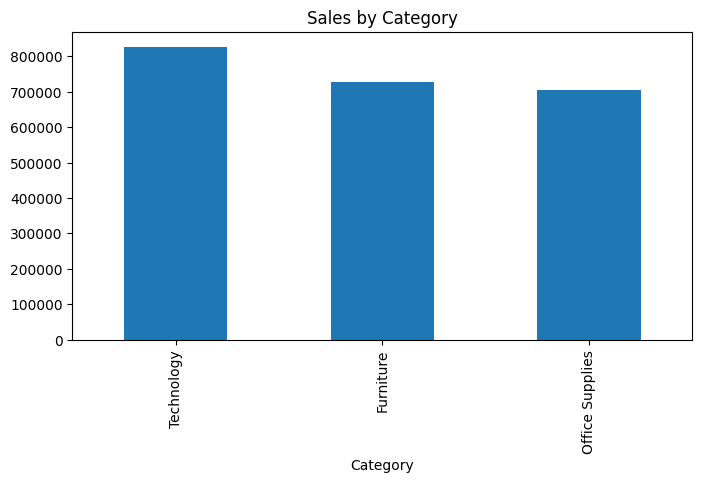

In [16]:
category_sales.plot(kind='bar', figsize=(8,4), title="Sales by Category")
plt.show()


##Sub-Category Contribution

In [17]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcat_sales.head(10)


,Sales
Sub-Category,
Phones,327782.4480
Chairs,322822.7310
Storage,219343.3920
Tables,202810.6280
Binders,200028.7850
Machines,189238.6310
Accessories,164186.7000
Copiers,146248.0940
Bookcases,113813.1987


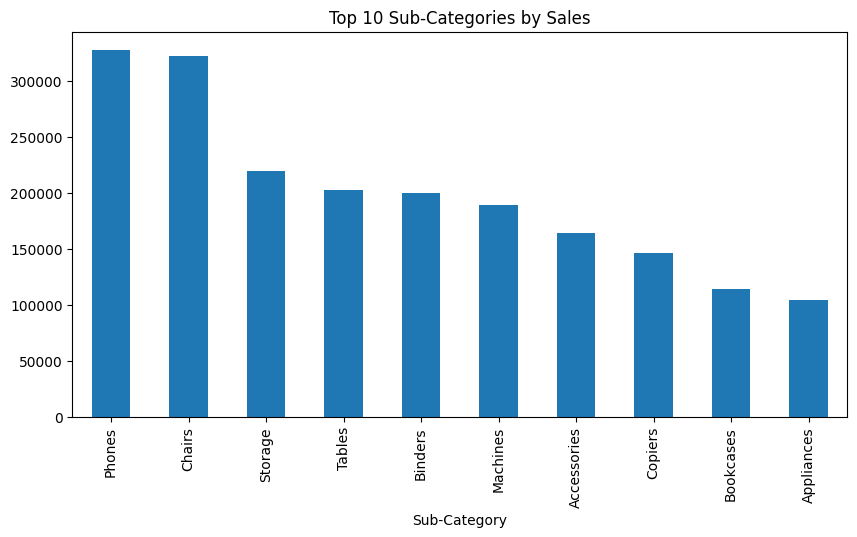

In [18]:
plt.figure(figsize=(10,5))
subcat_sales.head(10).plot(kind='bar')
plt.title("Top 10 Sub-Categories by Sales")
plt.show()


##Regional Performance

In [19]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales


,Sales
Region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590


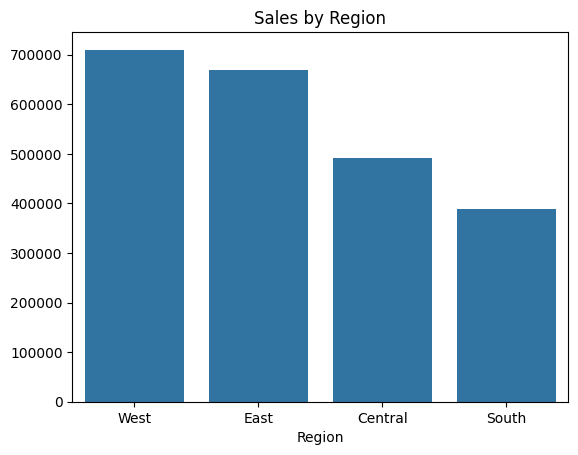

In [20]:
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()


##Customer Segment Analysis

In [21]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales


,Sales
Segment,
Consumer,1.148061e+06
Corporate,6.884941e+05
Home Office,4.249822e+05


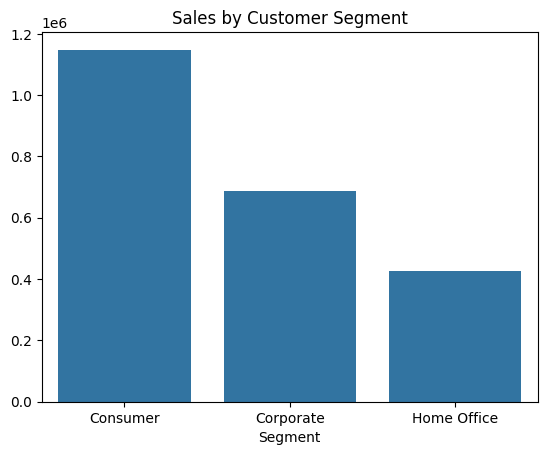

In [22]:
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title("Sales by Customer Segment")
plt.show()


##Sales Distribution Analysis

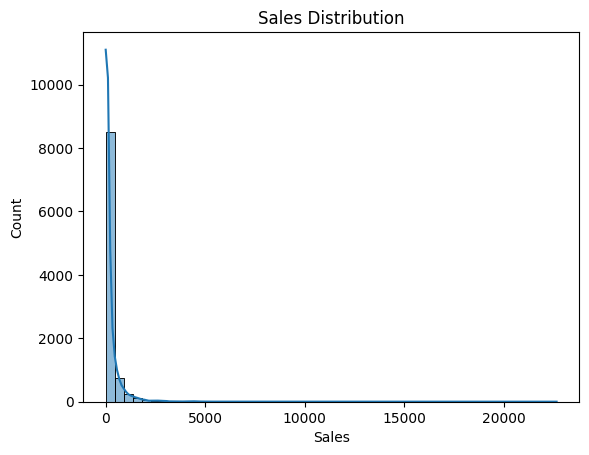

In [23]:
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()


##🔍 Key Insights

Technology is the highest revenue-generating category

Sales are concentrated in a few sub-categories (Phones, Chairs, Storage)

West region outperforms all other regions in total sales

Consumer segment contributes the largest share of revenue

Sales are right-skewed, with few high-value orders driving totals

## 📌 Summary

Revenue is driven mainly by Technology products, top sub-categories, the West region, and Consumer customers, with a small number of high-value orders significantly impacting overall sales.